In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")
df = pd.read_csv("C:/Users/ahmet/pandas/american_bankruptcy.csv")
pd.set_option("display.max_columns",None)
df_ = df.copy()

In [18]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [19]:
df_

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [20]:
df_.rename(columns={'X1': 'current_assets', 'X2': 'material_cost', 'X3': 'amortization_expense', 'X4': 'EBITDA',
                    'X5': 'inventory', 'X6': 'net_income', 'X7': 'unpaid_payments', 'X8': 'market_value', 
                    'X9': 'net_sales', 'X10': 'total_assets', 'X11': 'long-term_debt', 'X12': 'EBIT', 'X13': 'gross_profit', 
                    'X14': 'total_current_liabilities', 'X15': 'net_profit', 'X16': 'total_revenue', 'X17': 'total_external_debt', 
                    'X18': 'operating_expenses'}, inplace=True) 

In [21]:
df_

,company_name,status_label,year,current_assets,material_cost,amortization_expense,EBITDA,inventory,net_income,unpaid_payments,market_value,net_sales,total_assets,long-term_debt,EBIT,gross_profit,total_current_liabilities,net_profit,total_revenue,total_external_debt,operating_expenses
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [22]:
df_.company_name.value_counts()

C_4081    20
C_6487    20
C_1153    20
C_4047    20
C_4056    20
          ..
C_1498     1
C_5908     1
C_2814     1
C_3997     1
C_3408     1
Name: company_name, Length: 8971, dtype: int64

In [23]:
df_ = df_.drop_duplicates(subset=['company_name'])

In [24]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8971 entries, 0 to 78677
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company_name               8971 non-null   object 
 1   status_label               8971 non-null   object 
 2   year                       8971 non-null   int64  
 3   current_assets             8971 non-null   float64
 4   material_cost              8971 non-null   float64
 5   amortization_expense       8971 non-null   float64
 6   EBITDA                     8971 non-null   float64
 7   inventory                  8971 non-null   float64
 8   net_income                 8971 non-null   float64
 9   unpaid_payments            8971 non-null   float64
 10  market_value               8971 non-null   float64
 11  net_sales                  8971 non-null   float64
 12  total_assets               8971 non-null   float64
 13  long-term_debt             8971 non-null   floa

In [25]:
df_["status_label"].value_counts()

alive     8362
failed     609
Name: status_label, dtype: int64

In [26]:
df_.drop(["company_name","year"],axis=1,inplace=True)

In [27]:
df_['status_label'] = df_['status_label'].map({'alive': 0, 'failed': 1})

In [28]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8971 entries, 0 to 78677
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status_label               8971 non-null   int64  
 1   current_assets             8971 non-null   float64
 2   material_cost              8971 non-null   float64
 3   amortization_expense       8971 non-null   float64
 4   EBITDA                     8971 non-null   float64
 5   inventory                  8971 non-null   float64
 6   net_income                 8971 non-null   float64
 7   unpaid_payments            8971 non-null   float64
 8   market_value               8971 non-null   float64
 9   net_sales                  8971 non-null   float64
 10  total_assets               8971 non-null   float64
 11  long-term_debt             8971 non-null   float64
 12  EBIT                       8971 non-null   float64
 13  gross_profit               8971 non-null   floa

Text(0.5, 1.0, 'Correlation Matrix')

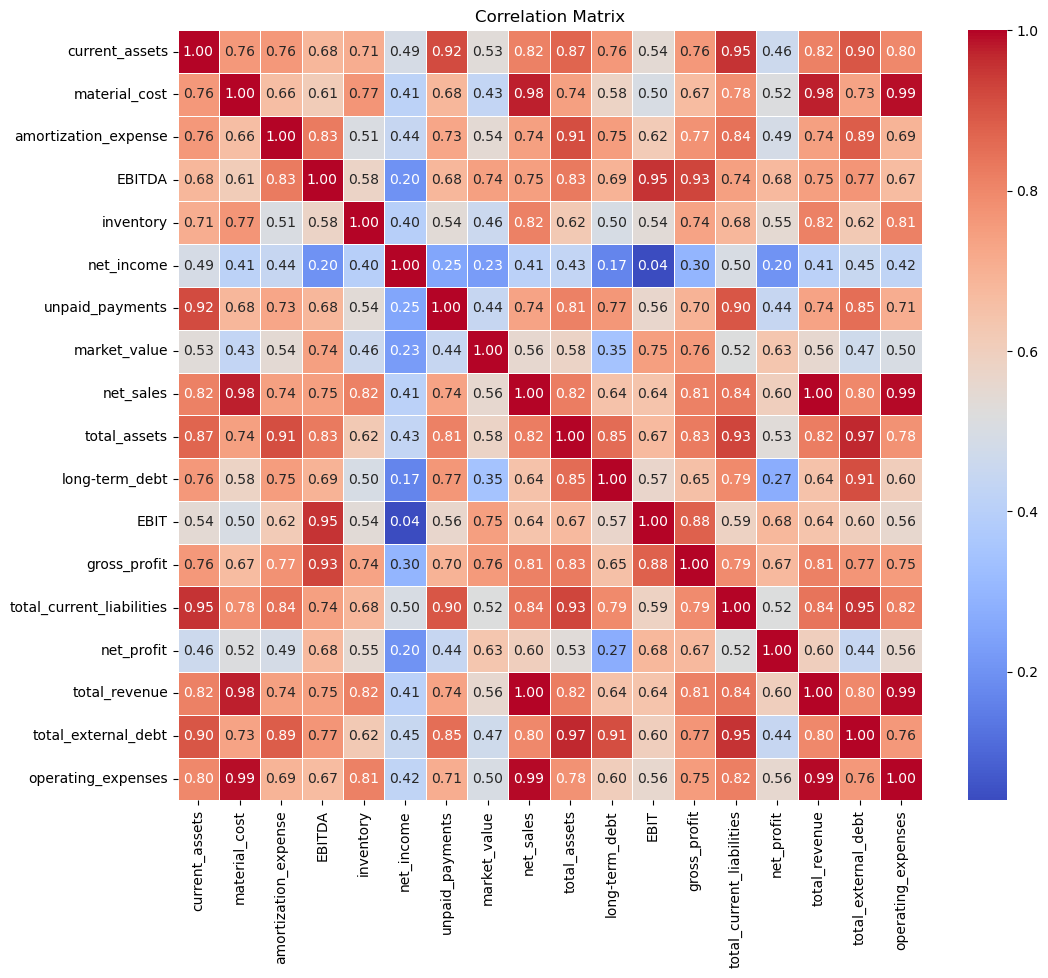

In [29]:
variables = ["current_assets", "material_cost", "amortization_expense", "EBITDA", "inventory", 
             "net_income", "unpaid_payments", "market_value", "net_sales", "total_assets", "long-term_debt", "EBIT", 
             "gross_profit", "total_current_liabilities", "net_profit", "total_revenue", "total_external_debt", "operating_expenses"]

data = df_[variables]
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

In [34]:
df_.drop(["net_income"],axis=1,inplace=True)

In [35]:
percentiles = [0.01,0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95,0.99]
summary = df_.describe(percentiles=percentiles)
print(summary)

       status_label  current_assets  material_cost  amortization_expense  \
count   8971.000000     8971.000000    8971.000000           8971.000000   
mean       0.067885      355.692937     656.684772             50.285063   
std        0.251563     1901.176374    3910.136640            287.173581   
min        0.000000        0.001000       0.000000              0.000000   
1%         0.000000        0.029000       0.006000              0.000000   
5%         0.000000        0.346000       0.212500              0.019000   
10%        0.000000        1.428000       0.982000              0.085000   
25%        0.000000       10.898000       8.057500              0.600500   
50%        0.000000       55.263000      41.394000              3.233000   
75%        0.000000      181.719500     225.290000             17.115000   
90%        0.000000      592.000000    1066.428000             80.710000   
95%        1.000000     1245.029500    2416.810500            190.361500   
99%        1

In [36]:
X = df_.drop('status_label',axis=1)
y = df_['status_label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=10000) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9192200557103064


Text(50.722222222222214, 0.5, 'True Label')

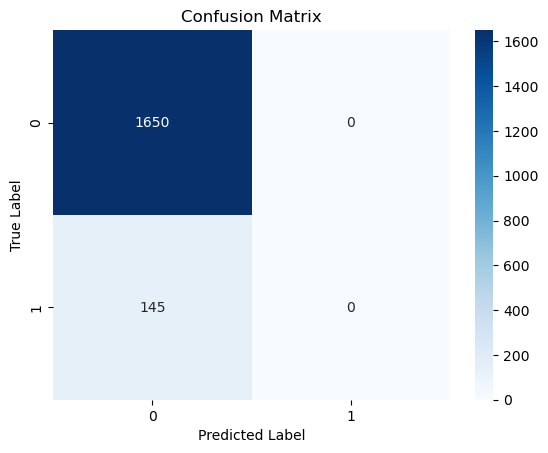

In [37]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")